<IPython.core.display.Javascript object>


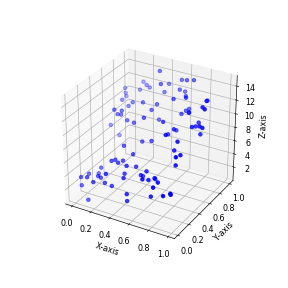

In [57]:
# imports
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

# generate random data-set
np.random.seed(0)
x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)
Y = 2 + 3 * x1 + 10 * x2 + np.random.randn(100, 1)

X = np.c_[x1,x2]
# plot
# plt.scatter(X[:,0],Y,s=10)
# plt.xlabel('x')
# plt.ylabel('y')
# plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = x1
y_vals = x2
z_vals = Y

# Plot the values
ax.scatter(x_vals, y_vals, z_vals, c = 'b', marker='o')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

plt.show()

In [73]:

def mse(y_pred, y):
    return np.sum( np.square(y_pred-y) )

class LinearRegression():
    def __init__(self, X, Y, learning_rate=0.01, iterations=1000):
        self.X = np.c_[ np.ones(X.shape[0]), X ]
        self.Y = Y
        self.learning_rate = learning_rate
        self.iterations = iterations
        #w0, w1, .., wn
        self.w = np.random.rand( X.shape[1] + 1, 1)
#         self.w = self.w.reshape((self.w.shape[0], 1))
        self.cost = []
    
    def infere(self, x):
        return np.dot(x, self.w)
    
    def train(self):
        for _ in range(self.iterations):
            y_pred = np.dot(self.X, self.w)
            residuals = y_pred - self.Y
            gradient_vector = np.dot( self.X.T, residuals )
            self.w -= (self.learning_rate/self.X.shape[0]) * gradient_vector
            self.cost.append( mse(y_pred, self.Y) )
    
    def printCostProgress(self):
        if not self.cost:
            print("The model has'n trained yet(")
            return
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.scatter(range(self.iterations),self.cost,s=10)
        plt.xlabel('epoch')
        plt.ylabel('cost')
        plt.show()

model = LinearRegression(X,Y, learning_rate= 0.1, iterations= 10000)
model.train()
# model.printCostProgress()
print( model.infere(np.array([[1,1,2]])) )

[[24.8448358]]
